## Estadistica Aplicada 

Sesion 15 - 18 octubre 

Ana Sofia Saucedo Garcia
1946646

Grupo 42

In [1]:
# Librerias basicas

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
## especializadas 

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

## 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

##
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12



In [3]:
# datos 

igae_deses= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')

In [4]:
igae_deses['meses']=pd.to_datetime(igae_deses['meses'],format='%Y/%m')
igae_deses=igae_deses.set_index('meses')
igae_deses=igae_deses.asfreq('MS')

In [5]:
pip install pmdarima

                                              0.0/566.2 kB ? eta -:--:--
     -------                                112.6/566.2 kB 2.2 MB/s eta 0:00:01
     ------------------                     276.5/566.2 kB 3.4 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 3.9 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 2.7 MB/s eta 0:00:00
                                              0.0/2.8 MB ? eta -:--:--
     -----                                    0.4/2.8 MB 12.9 MB/s eta 0:00:01
     ------------                             0.8/2.8 MB 10.6 MB/s eta 0:00:01
     ---------------                          1.1/2.8 MB 8.7 MB/s eta 0:00:01
     ------------------                       1.3/2.8 MB 7.4 MB/s eta 0:00:01
     -----------------------                  1.7/2.8 MB 7.6 MB/s eta 0:00:01
     ---------------------------              1.9/2.8 MB 7.2 MB/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pmdarima as pm 

# ignorar los warnings 
import warnings 
warnings.filterwarnings("ignore")

In [7]:
help(pm.auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


In [10]:
pm.auto_arima(igae_deses['IGAE_DESES'],start_p=1, start_q=1,m=12,max_p=7,max_q=7,ic='aic',seasonal=False)

ARIMA(order=(1, 1, 2), scoring_args={}, suppress_warnings=True)

In [12]:
## ARIMA ESTACIONAL

## Series de tiempo con componente estacional

pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

In [13]:
pasajeros=pasajeros.asfreq('MS')

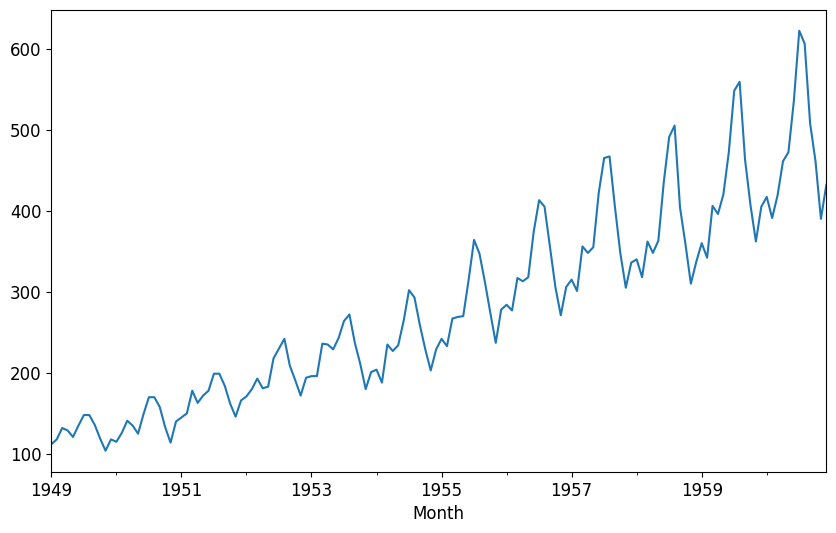

In [15]:
pasajeros['Thousands of Passengers'].plot();

In [16]:
## si la serie es estacionaria

prueba_DFA= adfuller(pasajeros['Thousands of Passengers'])
pvalue= prueba_DFA[1]
pvalue

0.991880243437641

No se rechza $H_0$ , la serie 'Thousands of passengers' es no estacionaria 

In [18]:
## Calcular las 1ras diferencias

pasajeros['passengers_diff']= pasajeros['Thousands of Passengers'].diff()

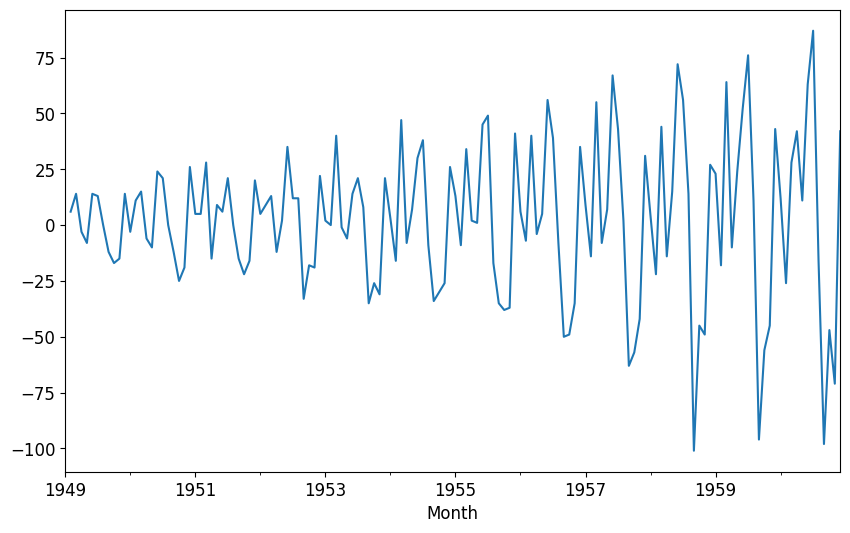

In [19]:
pasajeros['passengers_diff'].plot();

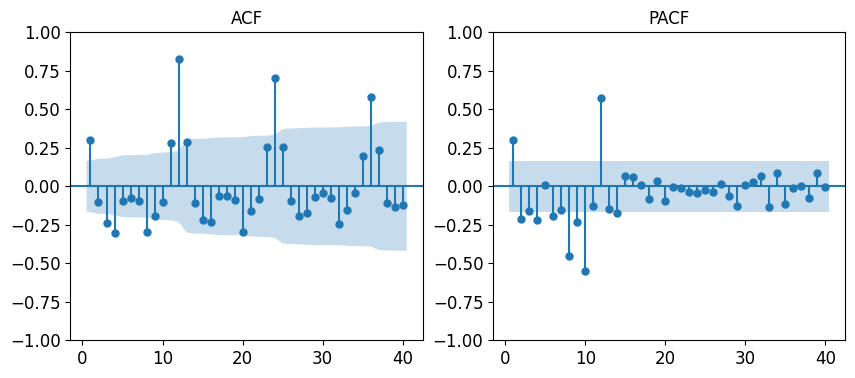

In [21]:
# Graficas de autocorrelacion 

ic,ax=plt.subplots(1,2,figsize=(10,4))

## 1
plot_acf(pasajeros['passengers_diff'].dropna(),zero=False,lags=40,ax=ax[0],title='ACF')
ax[0].set_ylim(-1,1)

## 2 
plot_pacf(pasajeros['passengers_diff'].dropna(),zero=False,lags=40,ax=ax[1],title='PACF')
ax[1].set_ylim(-1,1)
plt.show()


Esta es una serie con componente estacional , es cuando hay aumentos y caidas en los mismos dias de cada año

(mientras que un serie estacionaria es cuando tiene varianza,covarianza y media constante )

In [22]:
pm.auto_arima(pasajeros['Thousands of Passengers'],
               ## ARIMA normal 
               start_p=1,
               start_q=1,
               m=12,
               max_p=7,
               max_q=7,
               ## Estacional
               seasonal=True,
               start_P=1,
               start_Q=1, 
               max_P=12,
               max_Q=12)


ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

SARIMA(p,I,q)(P,D,Q)

SARIMA(0,1,1)(2,1,0)


In [24]:
# ESTIMAR MODELO 

model=ARIMA(pasajeros['Thousands of Passengers'],order=(0,1,1),seasonal_order=(2,1,0,12))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:           Thousands of Passengers   No. Observations:                  144
Model:             ARIMA(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                           Wed, 18 Oct 2023   AIC                           1019.178
Time:                                   16:15:53   BIC                           1030.679
Sample:                               01-01-1949   HQIC                          1023.851
                                    - 12-01-1960                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372

In [25]:
pasajeros['pronostico']= results.predict()

In [26]:
pasajeros.head()

,Thousands of Passengers,passengers_diff,pronostico
Month,,,
1949-01-01,112,NaN,0.000000
1949-02-01,118,6.0,111.997178
1949-03-01,132,14.0,117.999698
1949-04-01,129,-3.0,131.999295
1949-05-01,121,-8.0,129.000151


In [27]:
pasajeros['pronostico'][0]=pasajeros['Thousands of Passengers'][0]

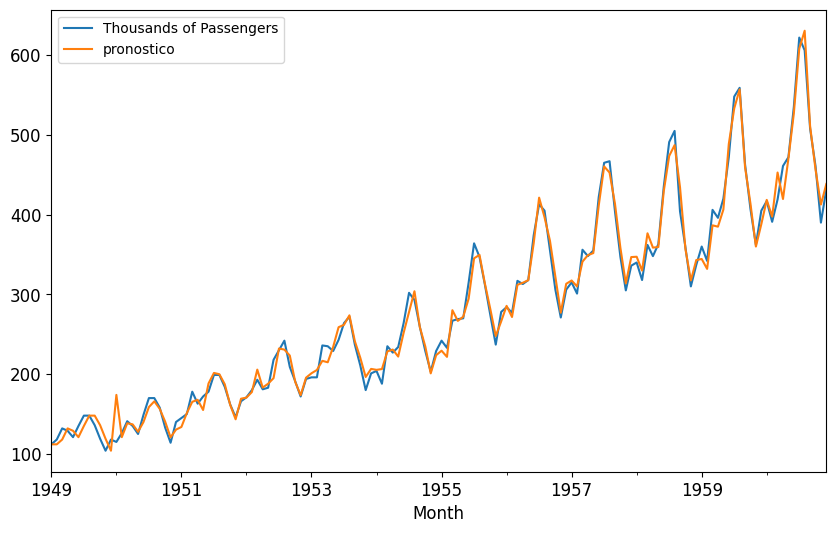

In [30]:
pasajeros['Thousands of Passengers'].plot()
pasajeros['pronostico'].plot()
plt.legend();

<Axes: xlabel='Month'>

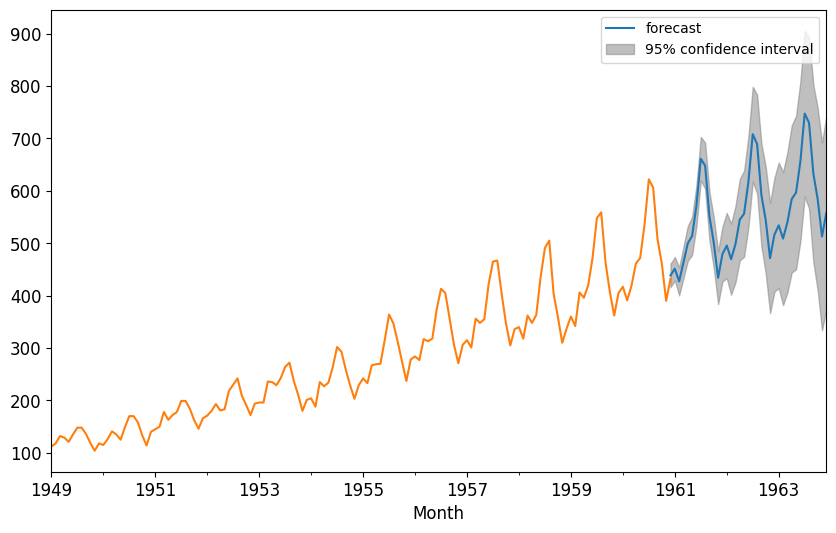

In [32]:
plot_predict(results,start='1960-12-01',end='1963-12-01')
pasajeros['Thousands of Passengers'].plot()



In [31]:
# para saber la ultima fecha de nuestros datos
pasajeros.tail(1)

,Thousands of Passengers,passengers_diff,pronostico
Month,,,
1960-12-01,432,42.0,438.478199


In [34]:
results.predict(start='1960-12-01',end='1963-12-01')

1960-12-01    438.478199
1961-01-01    451.347076
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310508
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532195
1962-12-01    516.127935
1963-01-01    534.240091
1963-02-01    508.800960
1963-03-01    539.738523
1963-04-01    584.297670
1963-05-01    596.726148
1963-06-01    655.955970
1963-07-01    747.458851
1963-08-01    729.939146
1963-09-01    632.906669
1963-10-01    583.931319
1963-11-01    512.892704
1963-12-01    558.168624
Freq: MS, Name: predicted_mean, dtype: float64